 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

In [2]:
csv_path_whale= Path("Resources/whale_returns.csv")
df_whale = pd.read_csv(csv_path_whale, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_whale.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [3]:
# Count nulls
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
df_whale= df_whale.dropna()
df_whale.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns
Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
csv_path_algo = Path("Resources/algo_returns.csv")
df_algo = pd.read_csv(csv_path_algo, index_col= 'Date',parse_dates=True,infer_datetime_format=True)

In [6]:
# Count nulls
df_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
df_algo = df_algo.dropna()
df_algo.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
csv_path_SP500= Path("Resources/sp500_history.csv")
df_SP500= pd.read_csv(csv_path_SP500, index_col= "Date", parse_dates=True, infer_datetime_format=True)

In [9]:
# Check Data Types
df_SP500.isnull().sum()

Close    0
dtype: int64

In [10]:
#sorting index
df_SP500 = df_SP500.sort_index(ascending=True)

In [11]:
# Fix Data Types
df_SP500["Close"]= df_SP500["Close"].str.replace("$","")
df_SP500.head()

<ipython-input-11-71217d7dd5cc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_SP500["Close"]= df_SP500["Close"].str.replace("$","")


Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93

In [12]:
#Changing the type of the column "Close" from a string to a float
df_SP500['Close']= df_SP500["Close"].astype(float)

In [13]:
# Calculate Daily Returns
daily_returns= df_SP500.pct_change()
daily_returns.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [14]:
# Counting number of nulls
daily_returns.isnull().sum()
# Drop nulls
daily_returns = daily_returns.dropna()
daily_returns.head()

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [15]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={'Close':'S&P 500 Returns'})
daily_returns.head()

S&P 500 Returns
Date                       
2012-10-02         0.000872
2012-10-03         0.003624
2012-10-04         0.007174
2012-10-05        -0.000322
2012-10-08        -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df= pd.concat([df_whale,df_algo,daily_returns], axis=1)
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2012-10-02                        NaN                 NaN   
2012-10-03                        NaN                 NaN   
2012-10-04                        NaN                 NaN   
2012-10-05                        NaN                 NaN   
2012-10-08                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  Algo 1  \
Date                                                                      
2012-10-02                          NaN                     NaN     NaN   
2012-10-03                          NaN                     NaN     NaN   
2012-10-04                          NaN                     NaN     NaN   
2012-10-05                          NaN                     NaN     NaN   
2012-10-08                          NaN                     NaN     NaN   

            Algo 2  S&P 500 Returns  
Date                                 
2012-10-02     NaN         0.000872  
2012-10-03     NaN         0.003624  
2012-10-04     NaN         0.007174  
2012-10-05     NaN        -0.000322  
2012-10-08     NaN        -0.003457

In [17]:
#droping the nulls
combined_df = combined_df.dropna()
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  S&P 500 Returns  
Date                                   
2015-03-03 -0.000949        -0.004539  
2015-03-04  0.002416        -0.004389  
2015-03-05  0.004323         0.001196  
2015-03-06 -0.011460        -0.014174  
2015-03-09  0.001303         0.003944

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date', ylabel='Daily_Returns'>

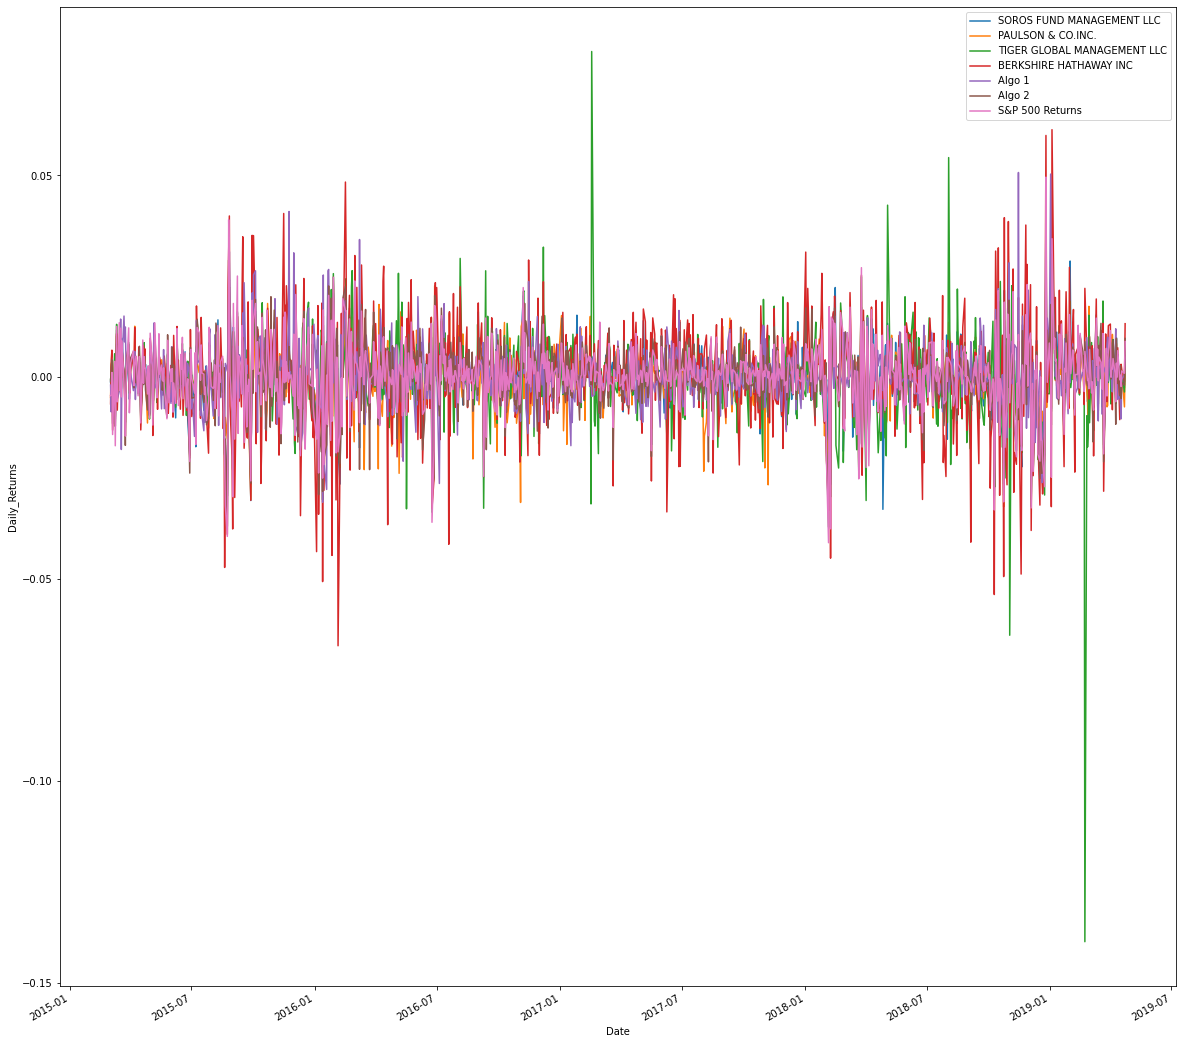

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,20), xlabel="Date", ylabel="Daily_Returns" )

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date', ylabel='Cum_Daily_Returns'>

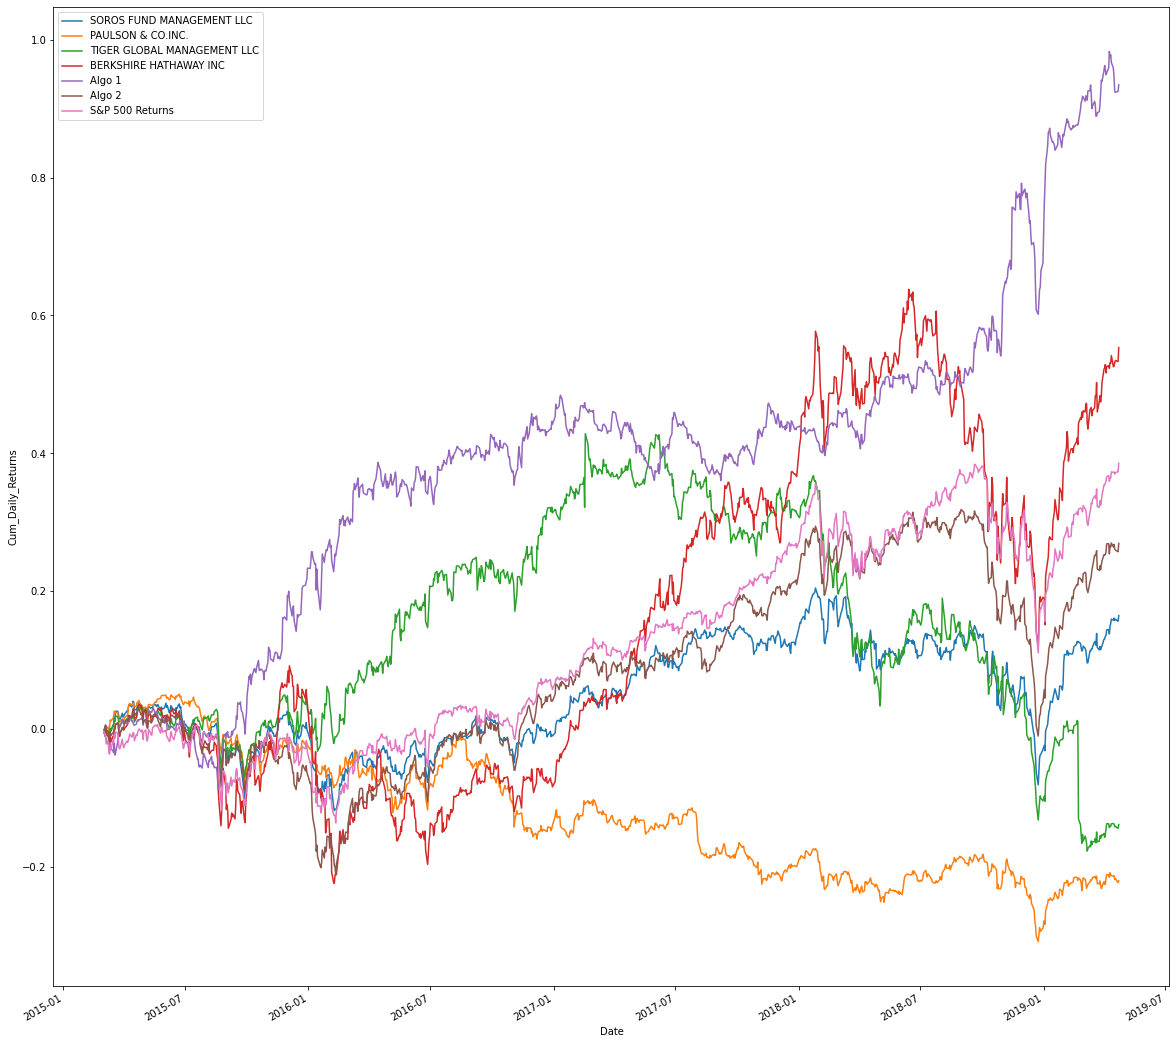

In [19]:
# Calculate cumulative returns of all portfolios
cum_daily_returns = (1+combined_df).cumprod()-1
cum_daily_returns.head()
# Plot cumulative returns
cum_daily_returns.plot(figsize=(20,20), xlabel="Date", ylabel="Cum_Daily_Returns" )

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

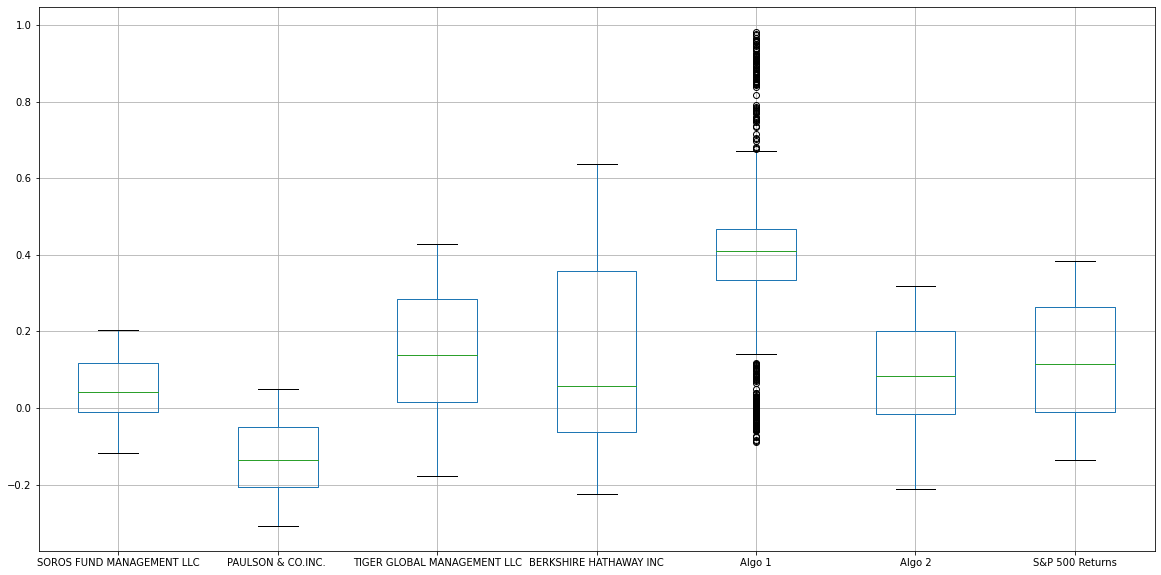

In [20]:
# Box plot to visually show risk
cum_daily_returns.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500 Returns                0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
daily_std_SP500=combined_df["S&P 500 Returns"].std()
print(daily_std_SP500)
# Determine which portfolios are riskier than the S&P 500
daily_std > daily_std_SP500

0.008553731597758204


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500 Returns                False
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std= daily_std*np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500 Returns                0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='date', ylabel='Returns'>

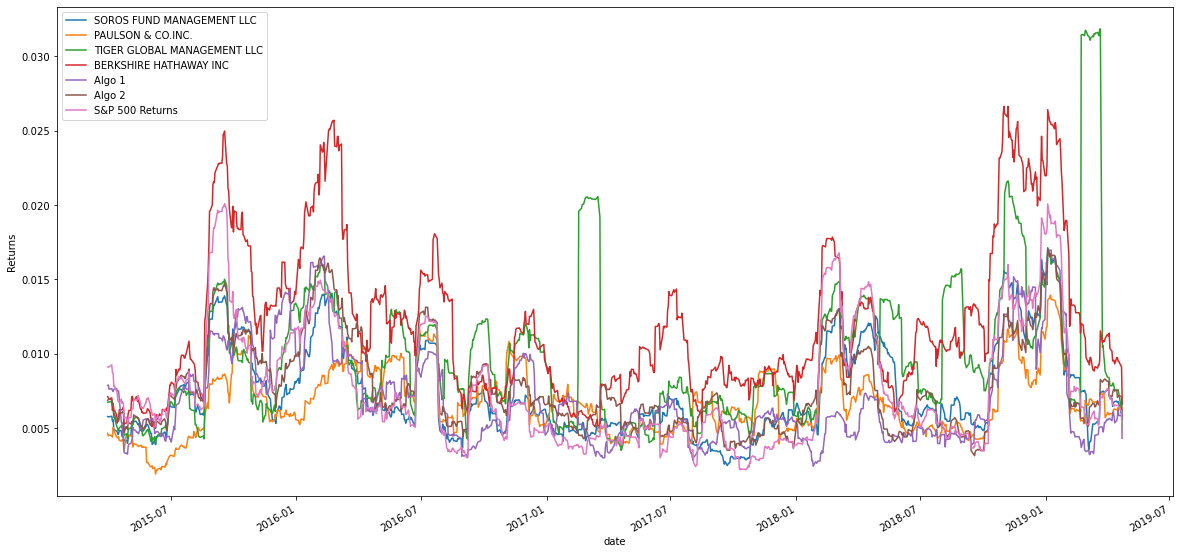

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21= combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(20,10),xlabel="date",ylabel="Returns")

### Calculate and plot the correlation

<AxesSubplot:>

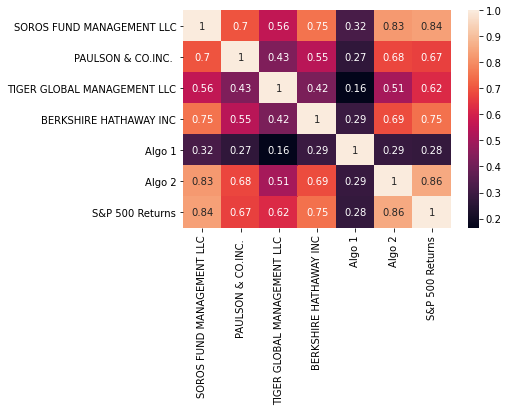

In [25]:
# Calculate the correlation for daily return 
price_correlation = combined_df.corr()
# Display de correlation matrix for daily return
sns.heatmap(price_correlation,annot=True)

<AxesSubplot:>

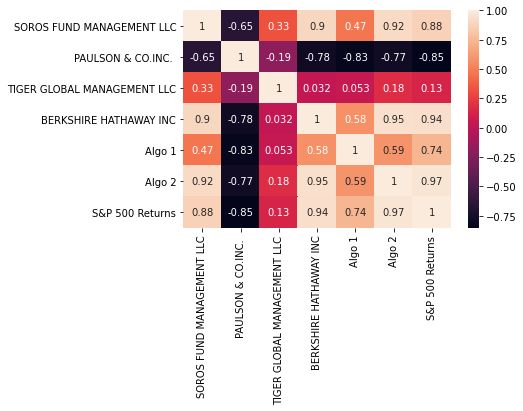

In [26]:
# Calculate the correlation for cummulative return 
price_correlation = cum_daily_returns.corr()
# Display de correlation matrix for cummulative return
sns.heatmap(price_correlation,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [27]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P 500 Returns'])
# Calculate variance of S&P 500
variance = combined_df['S&P 500 Returns'].var()
# Computing beta
SOROS_beta= covariance/variance
print(SOROS_beta)


0.773375354779462


<AxesSubplot:title={'center':'Rolling 21Day Beta of SOROS FUND MANAGEMENT'}, xlabel='Date'>

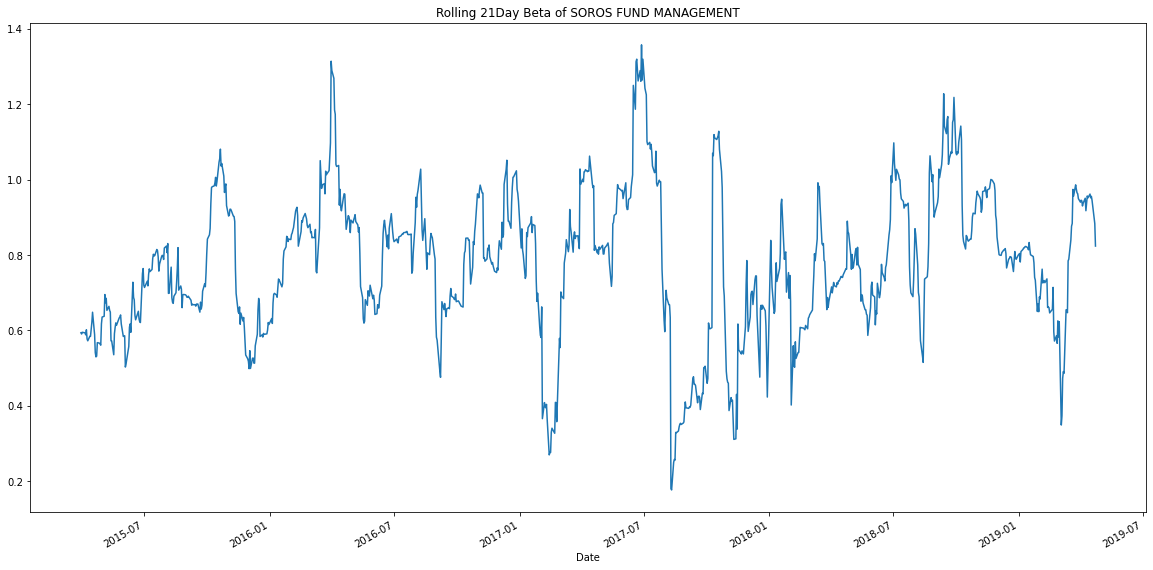

In [28]:
# Plot beta trend
## we need to calculate the rolling Variance and rolling Coveriance:
rolling_coveriance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(combined_df['S&P 500 Returns'])
rolling_variance = combined_df['S&P 500 Returns'].rolling(window=21).var()
rolling_beta = rolling_coveriance/rolling_variance
rolling_beta.plot(figsize=(20,10),title="Rolling 21Day Beta of SOROS FUND MANAGEMENT")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [29]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21)

ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
sharpe_ratio=combined_df.mean()/combined_df.std()
A_sharpe_ratio= (252**0.5)*sharpe_ratio
A_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500 Returns                0.648267
dtype: float64

<AxesSubplot:>

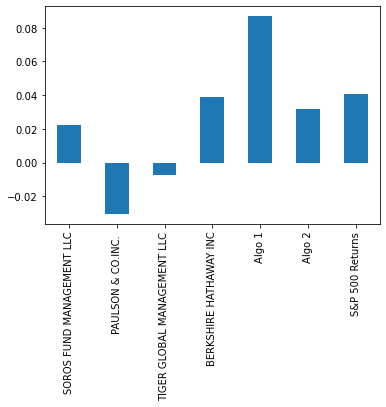

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---Algorithm 1 has a very high sharpe ratio and outperformed both the whales and the S&P500

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [32]:
# Reading data from 1st stock
csv_aapl= Path("Resources/aapl_historical.csv")
aapl_df= pd.read_csv(csv_aapl, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_df= aapl_df.rename(columns= { 'NOCP':'AAPL'},inplace=False)
aapl_df

Symbol    AAPL
Trade DATE               
2019-05-09   AAPL  200.72
2019-05-08   AAPL  202.90
2019-05-07   AAPL  202.86
2019-05-06   AAPL  208.48
2019-05-03   AAPL  211.75
...           ...     ...
2018-05-17   AAPL  186.99
2018-05-16   AAPL  188.18
2018-05-15   AAPL  186.44
2018-05-14   AAPL  188.15
2018-05-11   AAPL  188.59

[250 rows x 2 columns]

In [33]:
# Reading data from 2nd stock
csv_goog= Path("Resources/goog_historical.csv")
goog_df= pd.read_csv(csv_goog, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_df=goog_df.rename(columns= { 'NOCP':'GOOG'},inplace=False)

In [34]:
# Reading data from 3rd stock
csv_cost= Path("Resources/cost_historical.csv")
cost_df= pd.read_csv(csv_cost, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_df=cost_df.rename(columns= { 'NOCP':'COST'},inplace=False)

In [35]:
# Combine all stocks in a single DataFrame
combined_df_2= pd.concat([aapl_df,goog_df,cost_df], axis=1)
combined_df_2.head()

Symbol    AAPL Symbol     GOOG Symbol    COST
Trade DATE                                              
2019-05-09   AAPL  200.72   GOOG  1162.38   COST  243.47
2019-05-08   AAPL  202.90   GOOG  1166.27   COST  241.34
2019-05-07   AAPL  202.86   GOOG  1174.10   COST  240.18
2019-05-06   AAPL  208.48   GOOG  1189.39   COST  244.23
2019-05-03   AAPL  211.75   GOOG  1185.40   COST  244.62

In [36]:
#Reorganize portfolio data by having a column per symbol
combined_df_2= combined_df_2.drop(columns='Symbol')
combined_df_2.head()

AAPL     GOOG    COST
Trade DATE                         
2019-05-09  200.72  1162.38  243.47
2019-05-08  202.90  1166.27  241.34
2019-05-07  202.86  1174.10  240.18
2019-05-06  208.48  1189.39  244.23
2019-05-03  211.75  1185.40  244.62

In [37]:
# Calculate daily returns
daily_returns_2= combined_df_2.pct_change()
# Drop NAs
daily_returns_2=daily_returns_2.dropna()
# Display sample data
daily_returns_2.head()

AAPL      GOOG      COST
Trade DATE                              
2019-05-08  0.010861  0.003347 -0.008749
2019-05-07 -0.000197  0.006714 -0.004806
2019-05-06  0.027704  0.013023  0.016862
2019-05-03  0.015685 -0.003355  0.001597
2019-05-02 -0.012279 -0.019226 -0.007890

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns=daily_returns_2.dot(weights)
# Display sample data
##sorting the data
portfolio_returns= portfolio_returns.sort_index(ascending=True)
portfolio_returns

Trade DATE
2018-05-11   -0.000012
2018-05-14    0.010216
2018-05-15   -0.009283
2018-05-16    0.001618
2018-05-17    0.006112
                ...   
2019-05-02   -0.013131
2019-05-03    0.004642
2019-05-06    0.019196
2019-05-07    0.000570
2019-05-08    0.001820
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
combined_df_joined= pd.concat([combined_df,portfolio_returns], axis=1)

combined_df_joined.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2  S&P 500 Returns   0  
2015-03-03 -0.000949        -0.004539 NaN  
2015-03-04  0.002416        -0.004389 NaN  
2015-03-05  0.004323         0.001196 NaN  
2015-03-06 -0.011460        -0.014174 NaN  
2015-03-09  0.001303         0.003944 NaN

In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df_joined=combined_df_joined.dropna()
combined_df_joined.rename(columns={0 : 'Portfolio_Daily_Return'}, inplace=True)
combined_df_joined.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2018-05-11                  -0.004717            0.000982   
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2018-05-11                     0.002624               -0.004125  0.000358   
2018-05-14                     0.000000                0.000000  0.000915   
2018-05-15                    -0.003189               -0.014606 -0.001135   
2018-05-16                     0.005480                0.004310 -0.002326   
2018-05-17                    -0.006267               -0.005140 -0.006949   

              Algo 2  S&P 500 Returns  Portfolio_Daily_Return  
2018-05-11  0.000281         0.001708               -0.000012  
2018-05-14  0.001635         0.000884                0.010216  
2018-05-15 -0.001139        -0.006842               -0.009283  
2018-05-16  0.003341         0.004061                0.001618  
2018-05-17  0.005205        -0.000856                0.006112

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
daily_std_2 = combined_df_joined.std()
ann_std_2 = daily_std_2*np.sqrt(252)
ann_std_2

SOROS FUND MANAGEMENT LLC      0.146455
PAULSON & CO.INC.              0.116489
TIGER GLOBAL MANAGEMENT LLC    0.232069
BERKSHIRE HATHAWAY INC         0.246672
Algo 1                         0.133423
Algo 2                         0.139262
S&P 500 Returns                0.151739
Portfolio_Daily_Return         0.212687
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='date', ylabel='Returns'>

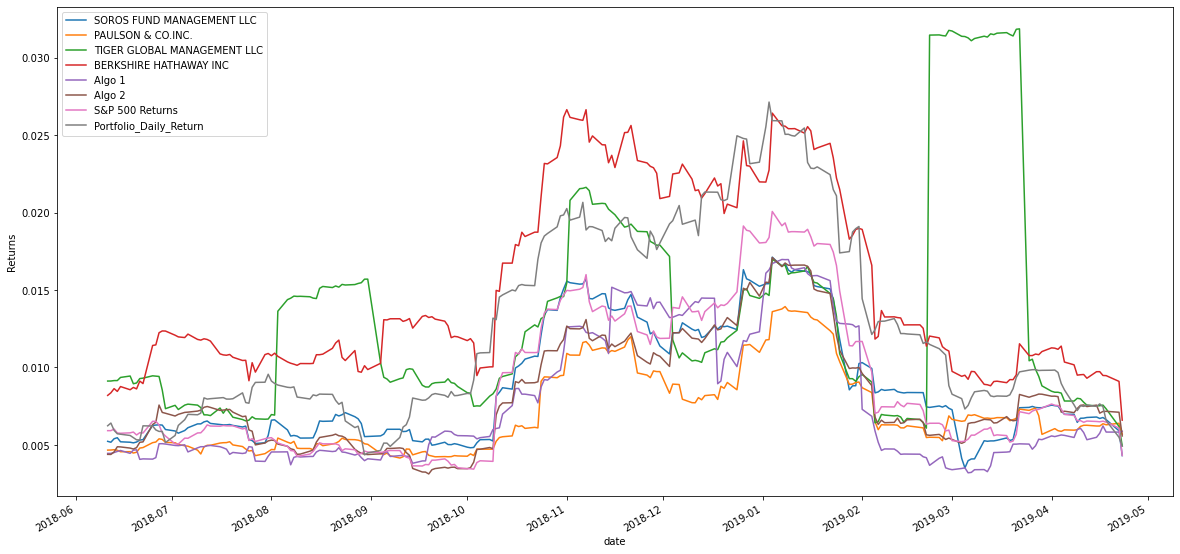

In [42]:
# Calculate rolling standard deviation
rolling_std_21_2= combined_df_joined.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_21_2.plot(figsize=(20,10),xlabel="date",ylabel="Returns")

### Calculate and plot the correlation

<AxesSubplot:>

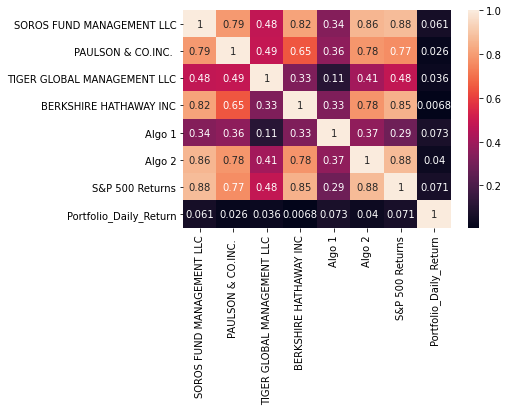

In [43]:
# Calculate and plot the correlation
price_correlation_2 = combined_df_joined.corr()
# Display de correlation matrix for daily return
sns.heatmap(price_correlation_2,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60_Day Beta of My portfolio'}>

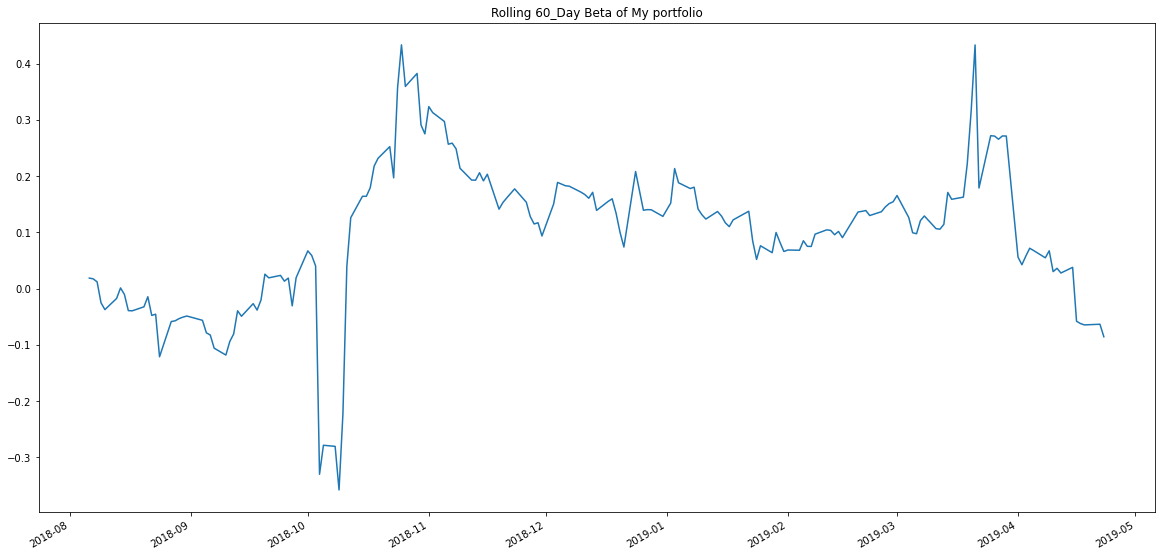

In [50]:
# Calculate and plot Beta
rolling_coveriance_2 = combined_df_joined['Portfolio_Daily_Return'].rolling(window=60).cov(combined_df['S&P 500 Returns'])
rolling_variance_2 = combined_df_joined['S&P 500 Returns'].rolling(window=60).var()
rolling_beta_2 = rolling_coveriance_2/rolling_variance_2
rolling_beta_2.plot(figsize=(20,10),title="Rolling 60_Day Beta of My portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio_2=combined_df_joined.mean()/combined_df_joined.std()
A_sharpe_ratio_2= (252**0.5)*sharpe_ratio_2
A_sharpe_ratio_2

SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
S&P 500 Returns                0.595486
Portfolio_Daily_Return        -0.614330
dtype: float64

<AxesSubplot:>

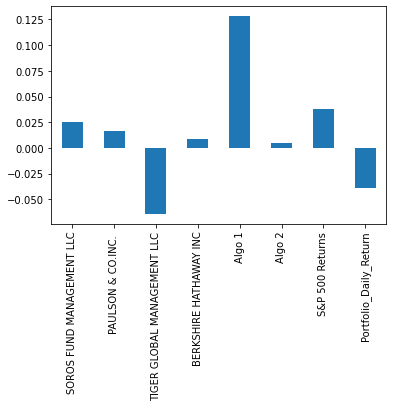

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_2.plot.bar()

### How does your portfolio do?

My Portfolio does not seems like it has performed well. Sharpe Ratio is negative which means that expected return is likely to be negative. 